In [1]:
from matplotlib import pyplot as plt

import os
import time
import torchvision
from torchvision import transforms, datasets
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
import torch as torch # pip install torch

yes_cuda = torch.cuda.is_available()
print(yes_cuda)

True


In [3]:
#for nvidia 
has_gpu = torch.cuda.is_available()
#for mac
has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "cuda" if torch.cuda.is_available() else "cpu"

print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

## Some Hyperparameters 
random_seed = 1
batch_size = 128
learning_rate = 0.01
num_epochs = 20
num_classes = 6

GPU is available
MPS (Apple Metal) is NOT AVAILABLE
Target device is cuda


C:\Users\User\AppData\Local\Temp\ipykernel_8096\1334374314.py:4: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  has_mps = getattr(torch,'has_mps',False)
C:\Users\User\AppData\Local\Temp\ipykernel_8096\1334374314.py:5: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  device = "mps" if getattr(torch,'has_mps',False) \


In [4]:
train_data_transform_example = torchvision.transforms.Compose([
    torchvision.transforms.Resize((132, 132)),
    torchvision.transforms.RandomHorizontalFlip(0.5),
    torchvision.transforms.RandomCrop((128, 128)),
    torchvision.transforms.ToTensor(),
    ])

#train_dataset = datasets.CIFAR10('./CIFAR10/', train=True, transform=train_data_transform_example, download=True)
train_data_dir = 'F:\\GSU\\Research\\Project 1\\Pythone Code\\New folder (2)\\new_data\\Train'
train_dataset = ImageFolder(root=train_data_dir, transform=train_data_transform_example)


train_loader_example = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    drop_last=True,
    num_workers=3,
    shuffle=False
)

batch_mean_list = []
batch_std_list = []

for ii, image in enumerate(train_loader_example, 0):
    np_image = image[0].numpy()
    batch_mean = np.mean(np_image, axis=(0, 2, 3))
    batch_std = np.std(np_image, axis=(0, 2, 3))
    
    batch_mean_list.append(batch_mean)
    batch_std_list.append(batch_std)
train_mean = np.mean(batch_mean_list, axis=0)
train_std = np.mean(batch_std_list, axis=0)

print('Mean of all train images:', train_mean)
print('Std Dev of all train images:', train_std)

Mean of all train images: [0.7769601  0.5559855  0.72657865]
Std Dev of all train images: [0.13961399 0.17414373 0.12789406]


In [6]:
from torchvision import transforms, datasets
from torch.utils.data.dataset import random_split
from torchvision.datasets import ImageFolder

train_data_transform = transforms.Compose(
    [
        transforms.Resize((132, 132)),
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomCrop((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize((0.777, 0.556, 0.727), (0.140, 0.174, 0.127))
    ]
)
test_data_transform = transforms.Compose(
    [
        transforms.Resize((132,132)),
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomCrop((128,128)),
        transforms.ToTensor(),
        transforms.Normalize((0.777, 0.556, 0.727), (0.140, 0.174, 0.127))
    ]
)

In [7]:
#train_dataset = datasets.FashionMNIST('./FashionMNIST/', train=True, transform=train_data_transform, download=True)
#test_dataset = datasets.FashionMNIST('./FashionMNIST/', train=False, transform=test_data_transform, download=True)

#train_dataset = ImageFolder(root="mnist-imgs/train", transform=train_data_transform)
#test_dataset = ImageFolder(root="mnist-imgs/test", transform=test_data_transform)
'''
train_dataset = datasets.CIFAR10('./CIFAR10/', train=True, transform=train_data_transform, download=True)
test_dataset = datasets.CIFAR10('./CIFAR10/', train=False, transform=test_data_transform, download=True)
'''
# Set paths to your train and test data directories
train_data_dir = 'F:\\GSU\\Research\\Project 1\\Pythone Code\\New folder (2)\\new_data\\Train'
test_data_dir = 'F:\\GSU\\Research\\Project 1\\Pythone Code\\New folder (2)\\new_data\\Test'

# Load train and test datasets
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=train_data_transform)
test_dataset = datasets.ImageFolder(root=test_data_dir, transform=test_data_transform)

print(len(train_dataset))
print(len(test_dataset))

train_dataset, valid_dataset = random_split(train_dataset, lengths=[21000, 4848])

25848
2717


In [8]:
#print(len(train_dataset))

In [9]:
from torch.utils.data import DataLoader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    drop_last=True,
    num_workers=3,
    shuffle=True
)
valid_loader = DataLoader(
    dataset=valid_dataset,
    batch_size=batch_size,
    drop_last=False,
    num_workers=3,
    shuffle=False
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    drop_last=False,
    num_workers=3,
    shuffle=False
)

Mini_batch Dimensions: [B, C, H, W] = 
torch.Size([128, 3, 128, 128])


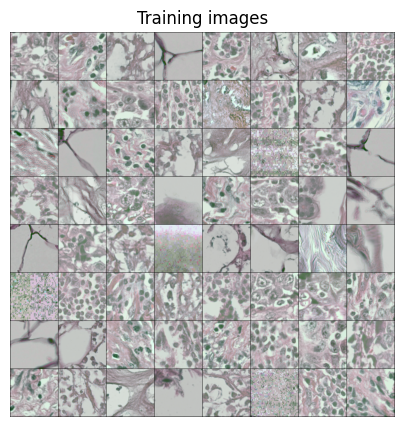

Labels = 
[[5 4 2 0 1 2 2 1]
 [2 4 4 1 2 4 2 3]
 [4 0 4 2 2 0 5 0]
 [1 2 5 0 4 5 3 0]
 [3 5 2 0 2 2 3 3]
 [0 1 1 2 1 5 5 1]
 [0 2 4 1 4 1 1 1]
 [4 2 2 4 2 0 5 4]]


In [19]:
import torchvision.utils as vutils

%matplotlib inline
import matplotlib.pyplot as plt

im_batch = next(iter(train_loader))
print('Mini_batch Dimensions: [B, C, H, W] = ')
print(im_batch[0].shape)
plt.figure(figsize=(5, 5))
plt.title("Training images")
plt.axis("off")
plt.imshow(
    np.transpose(
        vutils.make_grid(im_batch[0][:64], nrow=8, padding=1, normalize=True), (1, 2, 0)
    )
)
plt.show()
print("Labels = " )
print(im_batch[1][:64].data.numpy().reshape(8,-1))


In [10]:
class CNN(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        
        self.num_classes = num_classes
        self.cnn_features = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            
            torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

            torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),

            torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

            #torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            #torch.nn.ReLU(inplace=True),

            #torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
            #torch.nn.ReLU(inplace=True),
            #torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        )
        self.fc_features = torch.nn.Sequential(
            #torch.nn.AdaptiveAvgPool2d(1),
            torch.nn.Flatten(),
            torch.nn.Linear(16384, 128),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(128, num_classes),
        )
        
    def forward(self, x):
        x = self.cnn_features(x)
        x = self.fc_features(x)
        return x

In [11]:
def accuracy(model, data_loader, device):
    ac = 0
    with torch.no_grad():
        model = model.train()
        true_pred = 0
        tot_samples = 0
        for imgs, labels in data_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)
            logits = model(imgs)
            _, label_pred = torch.max(logits, axis=1)
            true_pred += (label_pred==labels).sum()
            tot_samples += labels.shape[0]
        acc = (true_pred/float(tot_samples))*100
    return acc.detach().cpu().numpy()

In [12]:
def losses(model, data_loader, device):
    with torch.no_grad():
        model = model.train()
        for imgs, labels in data_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)
            logits = model(imgs)
            loss = F.cross_entropy(logits, labels)
    return loss.detach().cpu().numpy()

In [13]:
train_accs = []
valid_accs = []
test_accs = []
train_losses = [10]
valid_losses = [10]
test_losses = [10]

In [14]:
torch.manual_seed(random_seed)
model = CNN(num_classes=num_classes)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

start = time.time()
for epoch in range(num_epochs):
    #los = 0
    model = model.train()
    for batch_idx, (imgs, labels) in enumerate(train_loader):
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        ## Forward Propagation - extract features and classify
        logits = model(imgs)
        loss = F.cross_entropy(logits, labels)
        
        #zero out the gradients
        optimizer.zero_grad()
        #estimate new gradients
        loss.backward()
        #update parameters
        optimizer.step()
        
        if not (batch_idx + 1) % 100:
            print(
                f"Epoch: {epoch + 1:03d}/{num_epochs:03d} | "
                f"Batch: {batch_idx + 1:03d}/{len(train_loader):03d} | "
                f"Loss: {loss:.4f}"
            )

    train_losses.append(loss.detach().cpu().numpy())
    
    # Tracking the Learning Rate Scheduler
    prev_lr = optimizer.param_groups[0]["lr"]
    scheduler.step()
    current_lr = optimizer.param_groups[0]["lr"]
    print(f"Epoch: {epoch+1:03d} Learning Rate {prev_lr:.8f} -> {current_lr:.8f}")
    
    #Evaluate Loss after each epoch
    model = model.eval()
    valid_loss = losses(model, valid_loader, device)
    valid_losses.append(valid_loss)

    test_loss = losses(model, test_loader, device)
    test_losses.append(test_loss)

    # Evaluate Performance after each epoch
    model = model.eval()
    tr_acc = accuracy(model, train_loader, device)
    train_accs.append(tr_acc)
    valid_acc = accuracy(model, valid_loader, device)
    valid_accs.append(valid_acc)
    print(f"Train Accuracy: {tr_acc:0.3f}")
    print(f"Validation Accuracy: {valid_acc:0.3f}")
    ts_acc = accuracy(model, test_loader, device)
    test_accs.append(ts_acc)
    print(f"Test Accuracy: {ts_acc:0.3f}")
    print(f"Time elapsed so far: {(time.time() - start) / 60:.2f} min")

print(f"Total Train Time: {(time.time() - start) / 60:.2f} min")

Epoch: 001/020 | Batch: 100/164 | Loss: 1.3919
Epoch: 001 Learning Rate 0.01000000 -> 0.01000000
Train Accuracy: 49.547
Validation Accuracy: 48.494
Test Accuracy: 49.650
Time elapsed so far: 4.53 min
Epoch: 002/020 | Batch: 100/164 | Loss: 1.3904
Epoch: 002 Learning Rate 0.01000000 -> 0.00500000
Train Accuracy: 56.683
Validation Accuracy: 55.219
Test Accuracy: 59.772
Time elapsed so far: 9.03 min
Epoch: 003/020 | Batch: 100/164 | Loss: 0.7709
Epoch: 003 Learning Rate 0.00500000 -> 0.00500000
Train Accuracy: 71.318
Validation Accuracy: 70.359
Test Accuracy: 66.838
Time elapsed so far: 12.94 min
Epoch: 004/020 | Batch: 100/164 | Loss: 0.9117
Epoch: 004 Learning Rate 0.00500000 -> 0.00250000
Train Accuracy: 73.776
Validation Accuracy: 72.649
Test Accuracy: 70.482
Time elapsed so far: 17.27 min
Epoch: 005/020 | Batch: 100/164 | Loss: 0.8023
Epoch: 005 Learning Rate 0.00250000 -> 0.00250000
Train Accuracy: 77.615
Validation Accuracy: 76.341
Test Accuracy: 71.807
Time elapsed so far: 21.60 m

In [15]:
model = model.eval()
ts_acc = accuracy(model, test_loader, device)
print(f"Test Accuracy: {ts_acc:0.3f}")

Test Accuracy: 73.353


In [18]:
def plot_accuracy(train_accs, valid_accs, test_accs):
    epochs = len(train_accs)
    plt.plot(range(1, epochs + 1), train_accs, label='Train Accuracy')
    plt.plot(range(1, epochs + 1), valid_accs, label='Validation Accuracy')
    plt.plot(range(1, epochs + 1), test_accs, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()
    plt.show()

In [19]:
def plot_loss(train_losses, valid_losses, test_losses):
    epochs = len(train_losses)
    plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, epochs + 1), valid_losses, label='Validation Loss')
    plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()
    plt.show()

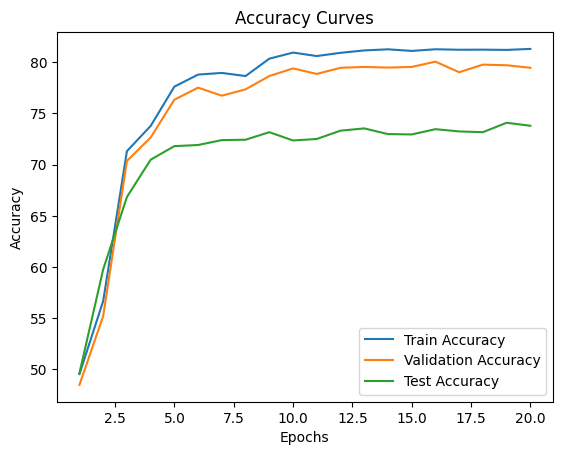

In [20]:
#train_accs.extend(train_accs.cpu().numpy())
#valid_accs.extend(valid_accs.cpu().numpy())
#test_accs.extend(test_accs.cpu().numpy())
plot_accuracy(train_accs, valid_accs, test_accs)

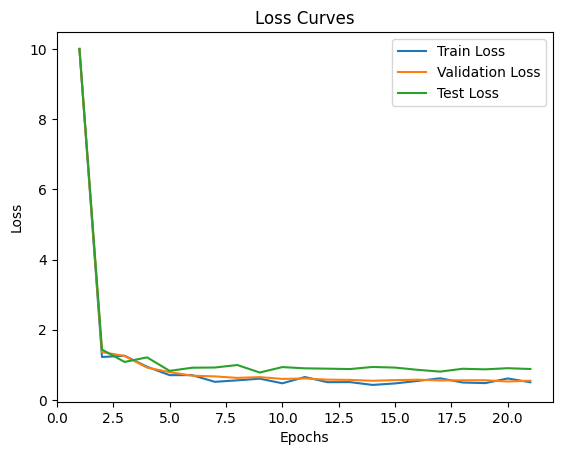

In [21]:
plot_loss(train_losses, valid_losses, test_losses)

In [22]:
true_labels = []
predicted_labels = []

with torch.no_grad():
    model.eval()
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

In [23]:
def plot_confusion_matrix(true_labels, predicted_labels, classes):
    cm = confusion_matrix(true_labels, predicted_labels)
    num_classes = len(classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=classes, yticklabels=classes)
    
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')
    
    
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

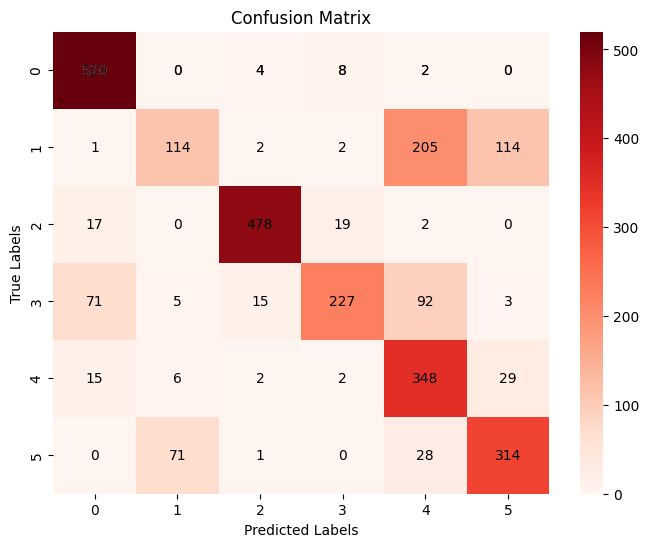

In [24]:
plot_confusion_matrix(true_labels, predicted_labels, classes=[str(i) for i in range(num_classes)])